In [11]:
import math
import itertools

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Intro to Bayesian Statistics

This week is dedicated to the myriad ways that we can apply Bayes Theorem to estimation and prediction. While Tuesday and Wednesday will focus on how Bayes is applied at scale to Data Science issues, this lesson will focus more on the requisite math and your first introduction to Bayes theorem.

This lesson is going to focus primarily on the math and intuition underpinning Bayes and less about the code to deliver those results. If you have a math background, this lesson may serve as more of a review than new material. If you don't, we'll try to be as clear as possible about why we're tackling this material and what you should know about it.

Today's main goals are to:

1. Introduce Bayes theorem 
2. Gain enough understanding into probability and combinatorics that we can understand probability distributions (for tomorrow's lesson on Conjugacy in Bayes)

# A big caution

This lecture is exceptionally light on code and heavier on conceptual material. I *strongly, strongly* recommend that you work out of the non-solution notebook. You will understand the material better and more deeply after grappling with answering the questions on your own. If you look at the solutions first, your understanding of this material is not likely to stick.

---

#### Today's Roadmap

We're going to briefly introduce a few different related concepts today, so I'm providing a quick cheatsheet on what each part does:

1. Probability -- how likely is a one (or a series of) events?
2. Combinatorics -- from a set of items, how many ways can we arrange them?
3. Probability Distributions -- what are the total likelihoods of all outcomes of a given situation? **Note**: this in _essence_ a combination of Probability and Combinatorics
    - Probability -- tells us how likely each given outcome is
    - Combinatorics -- tells us how many outcomes there are
4. Bayes Theorem -- uses probabilities of two related events to give us new information
5. Bayes Theorem (in practice) -- _instead of using individual probabilities, use probability distributions for multiple events_

We're not going to get to step 5 today. Today is all of the information needed to be ready for tomorrow. 

## Probability

Probability identifies how likely something is to be -- while this is typically an event (a coin landing on heads), we apply it broadly. 

Probability ranges between 0 and 1 -- at 1, the event will occur and at 0, the event will not occur. It is usually denoted this way:

$$ p(\text{rains today}) = 0.25 $$

This tells us that the probability that it rains today to be $0.25$ -- in other words, there's a 25% chance that rains today. 

Assuming that there this an exhaustive option (either it rains, or it does not rain), we also know the inverse -- there is a $1 - p$ chance of _not_-p happening. There is a 75% chance that it will do anything else besides rain today.


#### Axioms

Probabilities follow these axioms:

##### Nonnegativity

For an event A, the probability of the event has to be greater than or equal to 0:

$$P(A) >= 0$$

###### Unit Measure

Over all possible events for a given case, the total probability is 1.

##### Additivity

For mutually exclusive or independent events, the probability that any of those events occurs is the sum of those probabilities.

### Probabilities of Two Independent Events

> Note: $\cap$ is read as "cap" and $\cup$ is read as "cup"

Independence means that the two events do not influence each other -- event $A$ is not anymore or any less likely to happen because $B$ happened, and vice versa. 

We might want to know how likely two independent events are to happen at the same time (i.e. $A$ **AND** $B$ happen). This is found by:

$$p(\text{A} \cap \text{B}) = p(A) \cdot p(B)$$

We also might want to know how likely it is that either event happens at the same time (i.e. either $A$ **OR** $B$ happens, but **NOT** $A$ _and_ $B$). This is found by:

$$p(\text{A} \cup \text{B}) = p(A) + p(B) - p(\text{A} \cap \text{B})$$

> In other words, we want the likelihood that $A$ or $B$ occurs without all of the cases where $A$ and $B$ have occured!

### Check for Understanding 1 (5 minutes)

Assume that I have these probabilities:

$$p(\text{rains today}) = 0.65$$

$$p(\text{I eat Chipotle for lunch}) = 0.5$$

$$p(\text{I see a dog on the way home}) = 0.40$$

Assume that these probabilities are independent and use Python or a calculator to solve the following questions:

1. How likely is it that I will eat Chipotle for lunch and that it rains today?
2. How likely is it that I will see a dog today on my way home and that it's raining today?
3. What about if I eat Chipotle for lunch **or** that it's raining today (but not both events)?
4. What about if it is _not_ raining today **or** that I see a dog on my way home (but not both events)?

We'll walk through question 4 together at the end of 5 minutes. 

1: 0.65 * 0.5 
2: 0.4 * 0.5 
3: 0.65 + 0.5  - (0.65*0.5) 
4: (1-0.65) +0.4 - (0.65*0.4) 

In [2]:
#1 
0.65 * 0.5 

0.325

In [3]:
#2 
0.4 * 0.5

0.2

In [4]:
#3 
0.65 + 0.5  - (0.65*0.5) 

0.825

In [9]:
#4 
(1-0.65) +0.4 - ((1-0.65)*0.4)

0.61

### Probabilities of Two Dependent Events

However, most events are not independent. We denote how likely it is that two events are dependent on each other by the following:

$$p(A|B) = 0.25$$

This is read as "$A$ given $B$" and can be interpreted as how likely $A$ is to occur if $B$ occurs. This lets us know a few things:

- If $p(A|B) = 0$, our events are mutually exclusive. They can't happen at the same time!
- If $p(A|B) = p(A)$, our events are independent. The chance of $A$ happening does not change if $B$ happens (or does not).

We can find calculate this number using:

$$p(B|A)=\frac{p(B\cap A)}{p(A)}$$

Technically, this means that our equation for joint probability is actually:

$$p(A \cap B) = p(A) \cdot P(B|A)$$

However, for independent events, $P(B|A) = P(B)$. 

We can rewrite how we find out whether **A** or **B** (but not both) happens as well, to account for dependency:

$$\begin{align}
p(A \cup B) &= p(A) + p(B) - p(\text{A} \cap \text{B}) \\
&= p(A) + p(B) - (p(A) \cdot P(B|A))
\end{align}$$

#### Example 1

How likely is it that it will rain **and** I will eat Chipotle, assuming that $p(\text{I eat Chipotle} | \text{Rains}) = 0.75$?

Let's start by writing out what we know:

$$p(A) = p(\text{Rains}) = 0.65$$

$$p(B) = p(\text{I eat Chipotle}) = 0.5$$

$$p(B|A) = p(\text{I eat Chipotle} | \text{Rains}) = 0.75$$

This means that I can find the probability that it rains **and** I eat Chipotle through the following:

$$\begin{align}
p(A \cap B) &= p(A) \cdot p(B|A)\\
p(\text{Rains} \cap \text{I eat Chipotle}) &= p(\text{Rains}) \cdot p(\text{I eat Chipotle} | \text{Rains}) \\
&= 0.65 \cdot 0.75 \\
&= 0.4875
\end{align}$$

Now we know this as well:

$$p(A \cap B) = p(\text{Rains} \cap \text{I eat Chipotle}) = 0.4875$$ 

taking our set of known quantities to:

- $p(A)$
- $p(B)$ 
- $p(B|A)$
- $p(A \cap B)$

Let's pause here and try it out! How would we determine the probability of eating Chiptole for lunch **or** it raining today, but not both events happening? Try on your own at your desk for the next **one minute**, and post your answer in the thread on Slack.

#### Example 2

Now that we know $p(B|A) = p(\text{Chipotle} | \text{Rains})$, can we use what we know to figure out the other half ($p(A|B) = p(\text{Rains} | \text{Chipotle})$)?

Remember that:

$$p(B|A)=\frac{p(B\cap A)}{p(A)}$$

and that:

$$p(A|B) = \frac{p(A \cap B)}{p(B)}$$

and that:

$$p(B \cap A) = p(B) \cdot p(A|B)$$

and that: 

$$p(A \cap B) = p(A) \cdot p(B|A)$$

that means that if we want to find out $p(A|B) = p(\text{Rains} | \text{Chipotle})$:

$$\begin{align}
p(A|B) &= \frac{p(A \cap B)}{p(B)}\\
p(\text{Rains} | \text{I eat Chipotle}) &= \frac{p(\text{Rains} \cap \text{I eat Chipotle})}{p(\text{I eat Chipotle})} \\
p(\text{Rains} | \text{I eat Chipotle}) &= \frac{p(\text{Rains}) \cdot p(\text{I eat Chipotle} | \text{Rains})}{p(\text{I eat Chipotle})} \\
&= \frac{0.65 \cdot 0.75}{0.5} \\
&= 0.975
\end{align}$$



One really interesting visualization of conditional probability is at [setosa.ai](http://setosa.io/conditional/). 

![](./images/probably_chipotle.png)

The key part of this interaction is this line:

$$ p(\text{Rains} | \text{I eat Chipotle}) = \frac{p(\text{Rains}) \cdot p(\text{I eat Chipotle} | \text{Rains})}{p(\text{I eat Chipotle})} $$

which generalized out is:

$$ p(A|B) = \frac{p(A) \cdot p(B|A)}{p(B)} $$

which is Bayes theorem!

We'll talk more about Bayes theorem at the end of the lesson, but the main takeaway here is:

1. Sometimes we want to know how likely one event (**A**) is given that another event (**B**) has happened
2. We may not be able to measure that empirically.
3. If we can measure (or make a guess about) how likely each of **A**, **B**, and **B** given that **A** has happened, then we can use Bayes Theorem to tell us about what we're really interested in!

### Check for Understanding 2 (10 Minutes)

This check for understanding will take place in small group discussions. Get into groups of 3-5 and discuss the following prompts:

1. If we have two fair coins (i.e., they aren't biased and always flip onto one side or the other with a 50% chance for each), what do we know about $p(\text{flip a heads})$ for both coins? Are they dependent or independent events? Can you find solutions to:
    1. how likely it is to flip a head on coin **A** given that we've flipped a head on coin **B**?
    2. how likely it is to flip three heads in a row on coin **A**?
    3. how likely it is to flip three heads in a row on coin **B**?
2. I can write out a series of coin flips like this: TTTHHHTHTH (in other words, tails, tails, tails, heads, heads, etc.) If I flip a fair coin twice:
    1. how many ways can I flip two heads?
    2. how many ways can I flip two tails?
    3. how many ways can I flip one head and one tail?
    4. how likely is it that I flip two heads? How would I know? What about two heads? What about one head and one tail?
3. In the real world, are events more likely to be dependent or independent? Why do you think so?

## Combinatorics 

The coin flipping example we just went through is an example of a combinatorics problem. Combinatorics address the question of sets and iteration: given some collection of items, how many different ways can we order them?

It's important to address this not only for the cool party tricks but also because it leads us into probability distributions (which we'll need for Bayes!)

Factorials are key for some of these types of problems. They are denoted like $4!$ and are calculated like this:

$$4! = 4 \cdot 3 \cdot 2 \cdot 1$$

We're going to discuss this across two dimensions:

- Combinations versus Permutations
- Replacement versus Without Replacement

and identify the four following equations:

|  | Combination | Permutation |
| :--- | :---:| :---: |
| **Replacement** | $$ \frac{(n + k -1)!}{k! (n-1)!}$$ | $$n^k$$ |
| **Without Replacement** | $$\frac{n!}{(n-k)! \cdot k!}$$ | $$\frac{n!}{(n - k)!}$$ |

### Combination and Permutation without Replacement

#### Permutations

An example of a type of question that permutations address is: "How many distinct groups of three students can I make from a class of 6?"

For permutations, each distinct ordering of results is a different instance or occurance of a group. It assumes that the order matters!

Let's assume that we have five wonderful markets in our shared classroom:

- Atlanta, GA
- Austin, TX
- Boston, MA
- Chicago, IL
- New York City, NY

and we want to give out 10 points of extra credit to one market, 5 points to the next, and 1 point to a third market.

This requires a permutation of students, because the order is important (first place should get a higher result than second place). Additionally, this needs to be without replacement -- we don't want Chicago getting first **and** second place!

For every distinct subset we waant to make (such as Chicago, Boston, Austin versus Atlanta, Austin, New York City), we want to make 3 choices -- this is represented as $3!$.

What we are choosing from is represented by $5!$  ($5 \cdot 4 \cdot 3...$) -- first we choose from 5 possible markets, then we choose from 4 markets, then we choose from 3 markets. This leads us to:

$$ P(n, k) = \frac{n!}{(n - k)!} $$

where $n$ is the number of items in the full set to select from and $k$ is the number of things you want in each subgroup.

For our question above, 

$$ P(5, 3) = \frac{5!}{(5-3)!} = 60 $$

There are 60 different ways to create unique sets of 3 markets. 

In [15]:
# We can also calculate this directly in python

markets = ['ATL',
           'ATX',
           'BOS',
           'CHI',
           'NYC']

print(len([market for market in itertools.permutations(markets, 3)]))
print([market for market in itertools.permutations(markets, 3)][:5])

60
[('ATL', 'ATX', 'BOS'), ('ATL', 'ATX', 'CHI'), ('ATL', 'ATX', 'NYC'), ('ATL', 'BOS', 'ATX'), ('ATL', 'BOS', 'CHI')]


In [16]:
import random
list_of_markets = [market for market in itertools.permutations(markets, 3)]

random.shuffle(list_of_markets)
print(list_of_markets[0])

('ATX', 'ATL', 'NYC')


In [18]:
family = ['Ajinth',
           'Joe',
           'Christudas',
           'Dhaya']

list_of_family = [f for f in itertools.permutations(family, 3)]
print (len(list_of_family))

24


> Why this type of construction? `itertools.permutations` creates what is known as a `generator` object. Rather than allocate a full set of memory for what could potentially be millions of permutations, a generator object saves memory by serving them up to you one at a time. This means that if we waant to do something like get the full count of items. we need to have the generator create each of its constituent values.

#### Combinations

Combinations create subsets from a larger set as well, with the caveat that we **do not care about the order of the items in each subgroup**. In other words:

- For a permutation of items: `('ATL', 'ATX', 'BOS')` and `('BOS', 'ATL', 'ATX')` are **different** groups
- For a combination of items: `('ATL', 'ATX', 'BOS')` and `('BOS', 'ATL', 'ATX')` are **the same** group

For cases without replacement, we represent it like this:

$$C(n, k) = \frac{P(n, k)}{k!}$$

or expanded as:

$$C(n, k) = \frac{n!}{(n-k)! \cdot k!}$$

This specific instance is used very frequently and is known as the binomial coefficient:

$$ \binom{n}{k}$$

which is read _n_ choose _k_ or, from a group of _n_ choose a group of _k_ items, with no concern about ordering.

Picking a group of 3 markets out of 5 gives us:

$$C(5, 3) = \frac{5!}{(5-3)! \cdot 3!} = 10$$

which results in $10$ groups of 3 markets each

In [ ]:
# Python also offers an option for us

print(len([market for market in itertools.combinations(markets, 3)]))
print([market for market in itertools.combinations(markets, 3)])

### Check for Understanding 3 (10 Minutes)

Break into pairs or small groups and answer the following:

![](./images/lock.jpg)

1. Should we call the item in the picture above a combination lock or a permutation lock?
2. Would you choose a combination or a permutation for the following cases? How many subgroups does each make?
   - 5 powerballs out of 69 possible balls
   - The makeup of a 3-flavor cone from the 35 flavors available at [Jeni's Ice Cream](https://shop.jenis.com/pick-your-own-mix)
   - How many ways I could call on 5 students from the 60 students in our class
   - How many ways I could assign 5 students to the 5 questions in this check for understanding
   
> Watch out for calculating this using `itertools` as this might create very, very large arrays memory! [`math.factorial`](https://docs.python.org/3/library/math.html#math.factorial) will let you calculate factorials directly and is recommended if there are a lot of possible permutations or combinations -- we often don't need to _know_ all the sets (which is what `itertools` gives us) but rather the _number_ of sets, which can be calculated by hand with `math.factorial`

We'll have someone come on mic to present their solutions for each of these sections (one from each market)


In [27]:
import math
f_60 = math.factorial(60)
f_55 = math.factorial(55)
f_5 = math.factorial(5)
r = f_60/(f_55*f_5)
print (r)

5461512.0


### Combination and Permutation with Replacement

We use combinations and permutations with replacement much less frequently than we do cases without replacement. 

#### Permutation with Replacement

Here we're asking: "how many ways can I combine the items in this set, replacing them each time I take one out?" 

One example might be the typical magician's card trick: if you choose a card, look at it, and shuffle it back in and draw a second, how many different permutations of cards could you see?

This is by far the easiest equation, because we have the same chance to draw a given card in every single draw:

$$ P^R(n, k) = n^k $$

In other words, I'm going to draw one of 52 cards the first draw and then I'm going to do it again the **next** time as well. 

$$ P^R(52, 2) = 52^2 = 2,704 $$

There are 2,704 different sets of cards you could see in this setup.

> Note: If we wanted to know the likelihood that we would see the *same* card twice by random chance, that would be:
$$ \frac{1}{52} \cdot \frac{1}{52} = (\frac{1}{52})^2 = 0.00037 \approx 0.037\%$$
which is just 1 divided by the number of possible permutations with replacement. The likelihood is asking "How likely is one specific instance of this to be?" while the permutation with replacement is asking "How many different ways can this be enumerated?"

#### Combination with Replacement

For combinations with replacement (in other words, how many groups can we make, returning each market (for example) back to the pot, we represent that as:

$$ C^R(n, k) = \frac{(n + k -1)!}{k! \cdot (n-1)!}$$

If I was going to randomly choose a market to call on for three different questions, we'd have:

$$ C^R(5, 3) = \frac{(5 + 3 - 1)!}{3! \cdot (5 - 1)!} = 35 $$

35 different pairings, which would include randomly calling on the same market 3 times in a row, etc.

> Note: One benefit of working with combinatorics is that your math looks very excited!

In [28]:
# Python equivalent using itertools

suits = ['H', 'D', 'S', 'C']
numbers = ['A', '2', '3', '4', '5', '6',
          '7', '8', '9', '10', 'J', 'Q', 'K']
cards = [s + n for s in suits for n in numbers]

# Permutation with replacement

print(len([card for card in itertools.product(cards, repeat=2)]))
print([card for card in itertools.product(cards, repeat=2)][0:5])

# Combination with replacement

print(len([market for market in itertools.combinations_with_replacement(markets, 3)]))
print([market for market in itertools.combinations_with_replacement(markets, 3)][0:5])

2704
[('HA', 'HA'), ('HA', 'H2'), ('HA', 'H3'), ('HA', 'H4'), ('HA', 'H5')]
35
[('ATL', 'ATL', 'ATL'), ('ATL', 'ATL', 'ATX'), ('ATL', 'ATL', 'BOS'), ('ATL', 'ATL', 'CHI'), ('ATL', 'ATL', 'NYC')]


### Check for Understanding 4 (5 Minutes plus Break)

While taking your break, answer the following two questions:

1. What is another example of a time where you would want to know the number of permutations with replacement?
2. What is another example of a time where you would want to know the number of combinations with replacement?

Pair up and work together to figure out solutions for each of your cases (if you don't have actual numbers, make a guess as to a good number and work from there)

## Probability Distributions

This section is a combination of the last two cases:

- **Probability**: asks how likely some event (or set of events) is to occur
- **Combinatorics**: enumerates how many different ways a set of things can be arranged

A probability _distribution_ is the set of different cases or groups of events with how likely each situation is. The easiest example is from one of our earlier Checks for Understanding, which asked how many different ways we can flip a fair coin twice.

We discovered that there were in fact 4 different ways:

- HH
- HT
- TH
- TT

and that each situation (flipping two heads, flipping one head, and flipping no heads) could be addressed by summing up all of the different distinct possibilities and dividing by the total number:

- 2 heads: (HH / 4) -- 25%
- 1 head: (HT, TH / 4) -- 50%
- 0 heads: (TT / 4) -- 25%

and we could even visualize this distribution of probabilities like this:

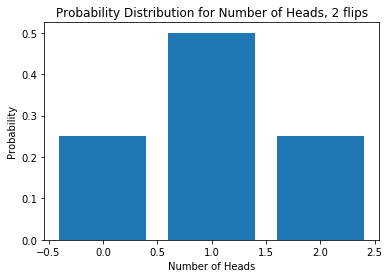

In [30]:
x = [0, 1, 2]
y = [0.25, 0.5, 0.25]

plt.bar(x, y)
plt.ylabel('Probability')
plt.xlabel('Number of Heads')
plt.title('Probability Distribution for Number of Heads, 2 flips')
plt.show()

How would we know the distribution of probabilities if we flipped three coins instead of two? We could manually estimate the following:

- 0 heads: TTT (1) 
- 1 head: HTT, THT, TTH (3)
- 2 heads: HHT, HTH, THH (3)
- 3 heads: HHH (1)

and so we could create a probability distribution for that case as well:

- 0 heads: 1/8 (0.125)
- 1 head: 3/8 (0.375)
- 2 heads: 3/8 (0.375)
- 3 heads: 1/8 (0.125)

and plot it out:

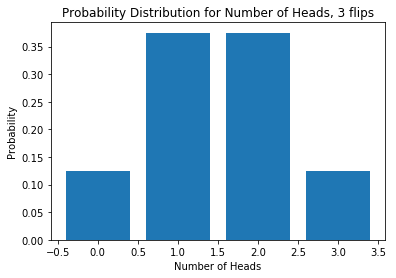

In [31]:
x = [0, 1, 2, 3]
y = [0.125, 0.375, 0.375, 0.125]

plt.bar(x, y)
plt.ylabel('Probability')
plt.xlabel('Number of Heads')
plt.title('Probability Distribution for Number of Heads, 3 flips')
plt.show()

Rather than continue to calculate this out manually, we can use something known as the **Binomial Distribution** to calculate the probability for:

- A given number of trials
- A given number of successes
- The **probability** of success

and, by iterating through all possible number of successes in that trial, we can see the full set of possibilities!

Let's assume that we want to figure out all probabilities of flipping heads out of five trials (that's 0 heads all the way to five heads out of five trials). 

Intuitively, we want to treat each occurance uniquely. We know there are 6 combinations of heads or tails with replacement (all heads, all tails, etc.) -- BUT there are many more permutations of 3 heads and 2 tails than there are combinations of 3 heads and 2 tails. We also know there's a certain likelihood of success (for example, if we had a very unfair coin, we still have the same number of possible combinations, it's just that achieving some are much more unlikley than others). 

The binomial distribution is:

$$Pr(k, n, p) = {n \choose k} p^k (1-p)^{n-k} $$

where:

- $n$ is the number of trials
- $k$ is the number of successes
- $p$ is the probability of a success (such as flipping a head)

Let's break this apart! The first portion is just combinations without replacement (i,e., the binomial coefficient). The second part is essentially weighting by the likelihood of getting one result ($p^{\text{number of success}}$) or the other ($(1-p)^{\text{number of NOT successes}}$) -- we choose this likelihood!


Let's assume that we have a fair coin ($p = 0.5$) and we would see that:
$$
\begin{align}
Pr(k, n, p) &= {n \choose k} p^x (1-p)^{n-x} \\
P(3, 5, 0.5) &= \frac{5!}{3!(5-3)!} 0.5^3 0.5^2 \\
&= 10 \cdot 0.125 \cdot 0.25 \\
&= 0.3125
\end{align}
$$

So, the chance of flipping 3 heads in 5 tries is 0.3125 (or roughly 31%).

If we go through each type of success, we can get a distribution of how likely (or not) each is! We'll write up a function in python to do this for us:

In [32]:
.5**5

0.03125

In [33]:
10*0.0125*0.25

0.03125

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]


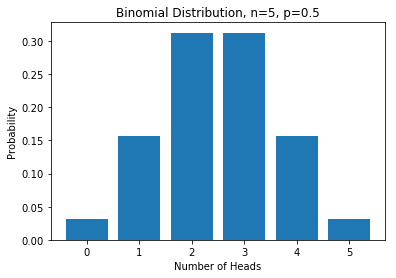

In [34]:
def binomial_likelihood(trials, successes, probability):
    trials_f = math.factorial(trials)
    successes_f = math.factorial(successes)
    t_minus_s_f = math.factorial(trials - successes)
    combinations = trials_f / (successes_f * t_minus_s_f)
    return combinations * (probability ** successes) * ((1 - probability) ** (trials - successes))

likelihoods = []

for x in range(0, 6):
    likelihoods.append(binomial_likelihood(5, x, 0.5))
    
plt.bar(range(0, 6), likelihoods)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Binomial Distribution, n=5, p=0.5')
print(likelihoods)

For example, how likely is flipping 0 heads out of 100? What about 50? What about 100? (all assuming a fair coin, of course)

In [35]:
for k in [0, 50, 100]:
    print('{} heads: {}'.format(k, binomial_likelihood(100, k, 0.50)))

0 heads: 7.888609052210118e-31
50 heads: 0.07958923738717877
100 heads: 7.888609052210118e-31


It would be exceptionally unlikely to flip 0 heads out of 100 flips.

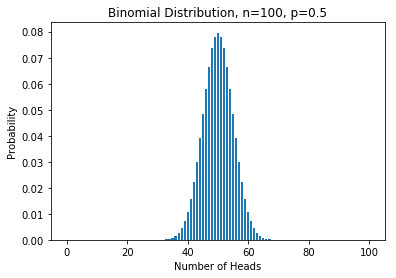

In [36]:
likelihoods = []

for x in range(0, 101):
    likelihoods.append(binomial_likelihood(100, x, 0.5))
    
plt.bar(range(0, 101), likelihoods)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Binomial Distribution, n=100, p=0.5')
plt.show()

We can even do fun things like ask how likely it is that we flip fewer than 50 heads or between 40 and 60 heads by summing up each of those probabilities:

In [37]:
print('Flips under 50 heads:', sum(likelihoods[:49]))
print('Flips between 40 and 60 heads:', sum(likelihoods[39:60]))

Flips under 50 heads: 0.3821767172013334
Flips between 40 and 60 heads: 0.9610666653405839


96% chance to flip between 40 and 60 heads seems very large, but it actually is correct:

In [38]:
print('Flips under 40 heads:', sum(likelihoods[:39]))
print('Flips above 60 heads:', sum(likelihoods[60:]))

Flips under 40 heads: 0.010489367838925859
Flips above 60 heads: 0.028443966820490392


One thing we may want to do is cumulatively sum up all the probabilities. This is known as a **cumulative density function**

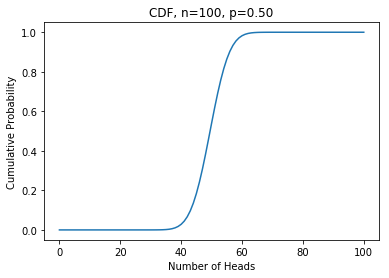

In [39]:
plt.plot(range(101), np.cumsum(likelihoods))
plt.xlabel('Number of Heads')
plt.ylabel('Cumulative Probability')
plt.title('CDF, n=100, p=0.50')
plt.show()

The value at any given place in a CDF is how likely you are to succeed up to that value. How likely am I to have flipped 0 to 45 heads?

In [40]:
print('Flipped up to 45 heads:', np.cumsum(likelihoods)[44])

Flipped up to 45 heads: 0.135626512037


In other words, the probability (mass/density) function shows how likely a result is at a given point, while the cumulative density function shows how likely a result is up to and including that given point.

> Note, probability mass functions are for discrete numbers of successes, probability density functions are for a continuous range -- we can't flip 3.25 heads!

### Check for Understanding 5 (10 Minutes)

Assume that we have two unfair coins (one flips heads at a 40% likelihood, while the other does so at a 65% likelihood). Use your knowledge of the binomial distribution and Python to answer the following questions:

- How likely is it to flip 5 heads out of 10 tries for both coins?
- Plot the PMF (probability mass function) and the CDF (cumulative density function) for each coin at 10 trials and 100 trials. How do they differ across the number of trials and across the likelihood to flip heads?

In [48]:
# Coin 1 

for k in [0, 50, 100]:
    print('{} heads: {}'.format(k, binomial_likelihood(100, k, 0.40)))

0 heads: 6.533186235000685e-23
50 heads: 0.010337511253847628
100 heads: 1.6069380442589993e-40


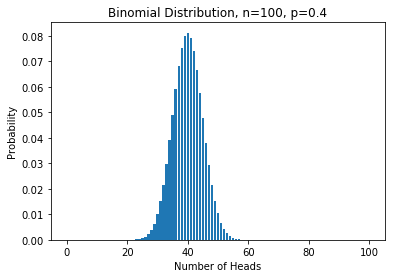

In [49]:
likelihoods = []

for x in range(0, 101):
    likelihoods.append(binomial_likelihood(100, x, 0.4))
    
plt.bar(range(0, 101), likelihoods)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Binomial Distribution, n=100, p=0.4')
plt.show()

In [47]:
# Coin 2 
for l in [0, 50, 100]:
    print('{} heads: {}'.format(l, binomial_likelihood(100, k, 0.65)))

0 heads: 1.9558505399828616e-19
50 heads: 1.9558505399828616e-19
100 heads: 1.9558505399828616e-19


### Other Probability Distributions

One thing you may have noticed is that the Binomial Distribution targets a very specific use-case: a set of trials (where we know the number of trials we will do!), a probability for success, a number of successes, and only one option (success or failure). There are many different distributions for probability (we've already seen some, like the Dirichlet distribution mentioned during our discussion on LDA), but we'll focus here on exploring a couple of either frequently seen distributions **or** cases where the use is interesting or immediately apparent.

Why go through these? With Bayes (as it will be used tomorrow), we're very frequently interested in using probability distributions instead of specific probabilities for one event versus the other. It helps to know what these distributions are before we use them in that context.

We're not going to necessarily do checks for understanding along the way, as we're less interested in the guts of each distribution as we are in familiarizing ourselves with the fact that they exist.

#### The Poisson Distribution

The poisson distribution asks how likely a number of successes is based on the average number of successes over time, assuming that these events are independent of each other.

Let's pretend I'm playing basketball and I make 9 successful free throws, making one free throw every second. But on average, I only make 4 successful free throws in a given time period. Is it likely or unlikely that I'd make 9 successful free throws in some time period when on average I only make 4 successful free throws during that same time period?

We can estimate how likely that is with the Poisson Distribution:

$$ p = \frac{e^{-\mu}\mu^x}{x!}$$

where:

- $e$ is the base of the natural logarithm (see [here](https://en.wikipedia.org/wiki/E_(mathematical_constant))
- $\mu$ is the mean number of successes for a given time period
- $x$ is the number of successes for this specific instance

> Note: the actual number of events here is unbounded! It just matters that the period is comprable and that the rate of attempts stays constant (i.e., I can't make 1,500 free throws in this specific case when I only usually attempt 20 free thows in general. 

$$
\begin{align}
p &= \frac{e^{-\mu}\mu^x}{x!} \\
p &= \frac{e^{-4}4^9}{9!} \\
&= 0.013
\end{align}
$$

In other words, if I on average make 4 free throws in a given time period, the Poisson Distribution would suggest that I only have a 1.3% chance to make 9 free throws in that same time period.

In fact, I can plot how likely some range of successes are (much like a binomial distribution):

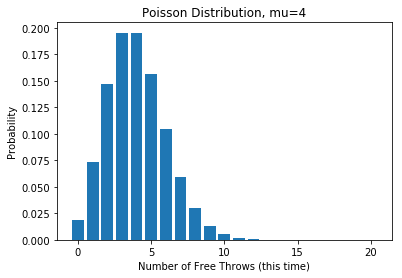

In [50]:
def poisson_distribution(mu, successes):
    numerator = (math.e**(-1 * mu) * mu**successes)
    return numerator / math.factorial(successes)

likelihoods = [poisson_distribution(4, x) for x in range(21)]

plt.bar(range(21), likelihoods)
plt.xlabel('Number of Free Throws (this time)')
plt.ylabel('Probability')
plt.title('Poisson Distribution, mu=4')

### Check for Understanding 6 (5 Minutes)

With a partner, tackle the following two prompts:

1. Does the poisson distribution above sum up to 1? Could it ever sum up to 1? Why or why not?
2. Because the Poisson distribution doesn't require a bound on the number of events, it is often used in forecasting. Imaagine you owned a bookstore that sells 23 books on average every Sunday:
    - How likely is it that you'll sell 17 books?
    - How likely is it that you'll sell 30 books?
    - How likely is it that you'll sell between 20 and 25 books?

#### The Multinomial and Hypergeometric Distributions

These distributions both identify how likely some set of **non-binary** successes are. The main difference is:

- the Multinomial Distribution is with replacement 
- the Hypogeometric Distribution is without replacement

These two distributions are harder to graph considering that we have successes over many dimensions as opposed to one, so we'll introduce a couple of examples and move on.

##### [Multinomial Distributions](https://en.wikipedia.org/wiki/Multinomial_distribution)

This is a generalization of the binomial distribution we talked about above. The best application of this distribution is to answer questions like "Assuming I roll a fair 6-sided dice 5 times, how likely is it that I get two 5s and three 4s?"

> Note: if questions like that really peak your interest, [Liar's Dice](https://en.wikipedia.org/wiki/Liar%27s_dice) may be a game for you!

The multinomial distribution is:

$$ p = \frac{n!}{n_1!n_2!n_3!n_4!} p_1^{n_1} p_2^{n_2} p_3^{n_3} p_4^{n_4}$$

where:

- $n$ is the total number of events
- $n_1...n_4$ is the number of "successes" for each event
- $p_1...p_4$ is the likelihood of each "success"

This would mean that if we wanted to figure out how likely the case above is (two 5s and three 4s on 5 rolls of the dice),

- $n=5$ -- 5 total trials
- $p_1...p_6=0.1\bar{6}$ -- 0.167 likelihood to land on each side
- $n_5=2, n_4=3, n_1, n_2, n_3, n_6=0$ -- 2 successes for 5, 3 successes for 4, 0 for all others:


$$
\begin{align}
p &= \frac{n!}{n_1!n_2!n_3!n_4!n_5!n_6!} p_1^{n_1} p_2^{n_2} p_3^{n_3} p_4^{n_4} p_5^{n_5} p_6^{n_6} \\
p &= \frac{5!}{0!0!0!3!2!0!} 0.167^0 0.167^0 0.167^0 0.167^3 0.167^2 0.167^0 \\
&= 10 \cdot 0.000129 \\
&= 0.00128
\end{align}
$$

So, a roughly 0.13% chance of rolling that specific combination of faces as identified above.

##### [Hypergeometric Distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution)

Finally, we might want to figure out the same thing without replacement. This is as if we were drawing cards from the deck and not shuffling them back in. In other words, given some number of draws from a set of objects, how likely is it that we draw exactly some number of one case?

The hypergeometric distribution is:

$$ p = \frac{\binom{k}{x}\binom{(N-k)}{(n-x)}}{\binom{N}{n}}$$

remembering that:

$$\binom{n}{k} = \frac{n!}{(n-k)! \cdot k!}$$

where:

- $k$ is number of successes conditions in the population
- $x$ is the number of successes in the sample drawn
- $N$ is the size of the population
- $n$ is the size of the sample

Let's assume that I had a jar of cookies, some that were vanilla flavored and some that were chocolate flavored. In fact, my jar looks like this:

- $k$ = 30 (30 chocolate cookies in the jar)
- $x$ = 6 (6 chocolate cookies drawn)
- $N$ = 50 (50 cookies in the jar total)
- $n$ = 10 (10 cookies drawn) 

How likely is it that I'd draw 6 chocolate cookies in a draw of 10 when there are 30 chocolate cookies in a jar full of 50?

$$
\begin{align}
p &= \frac{\binom{k}{x}\binom{(N-k)}{(n-x)}}{\binom{N}{n}} \\
p &= \frac{\binom{30}{6}\binom{(50-39)}{(10-6)}}{\binom{50}{10}} \\
\\
p &= \frac{\frac{30!}{(30-6)! \cdot 6!}\frac{20!}{(20-4)! \cdot 4!}}{\frac{50!}{(50-10)! \cdot 10!}}\\
\\
p &= \frac{593,775 \cdot 4,845}{10,272,278,170} \\
p &= 0.28
\end{align}
$$

We are 28% likely to pull 6 chocolate cookies out of 10 when there are 30 chocolate cookies in the jar of 50. 

### Wrapping up Probability Distributions

You can imagine that both applying these distributions correctly **and** calculating them out by hand for all possible outcomes is very tedious. We're going to rely a lot on libraries that have built out this functionality for us (such as Scipy or Numpy) to do the heavy lifting for us under the hood. In addition, we're going to focus more on how these distributions are used in Bayes and less on appropriately applying them to a unique problem ourselves.

Does this mean that our time here was wasted? No! Being familiar with these concepts and knowing that they are at play is essential both to understand how Bayesian Statistics operates, but also to engage in the process of Data Science more generally. It is relatively simple to learn the right "code" for a specific thing to do. Our goal is to teach you enough code to work in this sphere but (and **much more importantly**) how to approach problems like a data scientist and to recognize and come up with good options for a given problem. If the code evaluates, it will run. We'd like to make sure you know the right things to do with the code.

## Back to Bayes

So, we're going to shift here and go back to Bayes, which we briefly touched on at the very start of this lesson. As a reminder, Bayes Theorem looks like this:

$$ p(A|B) = \frac{p(A) \cdot p(B|A)}{p(B)} $$

where we want to know $p(A|B)$ (how likely A is, given B, and we have access to:

- $p(A)$ -- the likelihood of A occuring
- $p(B)$ -- the likelihood of B occuring
- $p(B|A)$ -- the likelihood of B occuring, given that A has occured

However, as modelers, we typically talk about Bayes in its diachronic interpretation (diachronic here referring to "over time"):

$$ p(model|data) = \frac{p(data|model)p(model)}{p(data)}$$

In other words, we have this (for a given piece of data or a givenset of data):

- $p(data)$ -- how likely is the piece of data that we're seeing right now?
- $p(model)$ -- how likely is our model or working assumption about the world to be true overall (i.e., in any case)
- $p(data|model)$ -- **if** our model were true, how likely is it that we would see the data that is in front of us?
- $p(model|data)$ -- given the data in front of us, how likely is our model or working assumption about the world to be true?

That last part ($p(model|data)$) is the key part. We don't know whether or not our hypothesis or model is true! But using Bayes, we can make the leap to say "Given that I see this set of data in front of me, I think this about my hypothesis now"

### Frequentist versus Bayesian Thought

#### Frequentism

Frequentists believe the "true" value of a statistic about a population (for example, the mean) is fixed (and not known). We can infer more more about this "true" distribution by engaging in sampling, testing for effects, and studying relevant parameters of the population.

Say we are flipping a coin and want to know the probability of heads. Frequentists formulate the probability of heads as a limit, defining the true probability of heads derived from an infinite number of coin flips with that.

#### Bayesianism

Bayesians believe that data informs us about the distribution of a statistic or event, and as we receive more data our view of the distribution can be updated, further confirming or denying our previous beliefs (but never in total certainty).

For the coin flip example above, we would write out the probability of heads as our belief in the probability of getting heads given the evidence we have from observing coin flips.

In other words, this sets us up to consider the following:

- Prior: our prior belief, before observing flips, of the probability of flipping heads ($p(flipping a head)$)
- Likelihood: the likelihood of the data we observe if we flip heads / when we have data ($p(we actually flip a head | flipping a head)$)
- (Marginal or) Total Probability: the probability of seeing that many heads ever ($p(we actually flip a head)$)

and our ultimate value of interest:

- Posterior: an updated belief in the model given the new data about the world. The observation of new data should inform (or update) our prior belief to some new posterior belief. (in other words, $p(flipping a head | we actually flip a head)$)

You'll see these terms (Prior, Likelihood, Marginal / Total Probability, Posterior) used quite often.

### What to remember

We don't ever know for sure whether our model or hypothesis is correct (or what it actually is!) What we are doing though is using evidence to change our beliefs about the world. As we get more data, our belief in what should happen should change with that.

### Worked Example - Pregnancy Screening

Imagine that I had a suspicion that someone was pregnant. We might use a pregnancy test to determine whether or not that's the case. Consider the following:

- Our hypothesis, $H$, is that this person is pregnant.
- A positive result on the pregnancy test is denoted $D$.

I also have some information about the world:

- $p(H) = 0.125$ -- in other words, on average, 12.5% of women are pregnant (not accurate whatsoever, but useful for our purposes here)
> Note: this is essentially an **uninformed** prior. We have no idea what our current state would be, so rather than pick something ourselves (such as "I think I'm 50% likely to be pregnant, that's why I'm testing"), we want to, as Bayesians, pick our priors carefully. If we pick values that are very large or very small (showing a lot of confidence in one position or the other) it can be very hard to change our mind. One of the bigger critiques towards Bayesians is the modeler-driven determination of the prior.
- $p(D) = 0.14$ -- 14% of people who take the pregnancy test come back with a positive result
- $p(D|H) = 0.85$ -- the likelihood states "How likely would we get data that looks like this if our hypothesis was true?" In other words, how accurate is our test? If we get a positive result on our hypothesis (H=1) the likelihood that we are pregnant is 0.85.

What we want to do is assess how likely a woman is to actually be pregnant who got a positive result on the test using Bayes Theorem.

Answer:

$$ 
\begin{align}
p(H|D) &= \frac{p(D|H)p(H)}{p(D)} \\
p(H|D) &= \frac{0.85 \cdot 0.125}{0.14}\\
p(H|D) &= 0.759
\end{align}
$$

So, we've got a good chance of being pregnant but we are not 100% -- that means that our posterior probability of somebody being pregnant ($H=1$) given the data that we've seen (a positive result on the test) is 0.759%.

This is why we put people through multiple tests to confirm a diagnosis!

### Worked Example 2 -- Another Pregnancy Test

Imagine that our hypothetical person goes to their doctor next for a more expensive but more accurate test. Here's what we know

- $p(H) = 0.759$ -- right now, we believe that we are almost 76% likely to be pregnant. Our belief has been moved by our last test and now is quite high
- $p(D) = 0.80$ -- this second test is expensive and only ordered by a doctor. People who take this test are very likely to be pregnant
- $p(D|H) = 0.97$ -- if the very expensive test says you're pregnant, you're almost certainly pregnant.

This would mean our posterior (if we score positive on the test, what does that say about whether or not we are pregnant?) would be:

$$ 
\begin{align}
p(H|D) &= \frac{p(D|H)p(H)}{p(D)} \\
p(H|D) &= \frac{0.97 \cdot 0.759}{0.80}\\
p(H|D) &= 0.92
\end{align}
$$

We're still not at 100% but we're very close. Notice that even though we scored positive a second time, because there are so many people who are pregnant taking this test, it doesn't give us the huge boost up that we originally received. 

### Check for Understanding 7 (10 Minutes)

With a partner, do the following:

1. Write a function in Python that returns the posterior. It should take in the prior $p(H)$, the total probability $p(D)$ and the likelihood $p(D|H)$. Test this function by plugging in the values from Worked Example 2
2. We're going to vary all three features to get some hand's on experience with Bayes:
    - What happens to your posterior belief as you make the total probability $p(D)$ bigger and smaller? You can imagine this like saying that people who take this test are 90% or 95% likely to be pregnant already or, conversely, 60% or 70% likely to be pregnant. Are there points at which the posterior gets driven above 1.0 (i.e., to the realms of impossibility?)
    - What happens if you make your prior belief $p(H)$ bigger and smaller? You can imagine this like changing how strongly you believe that the person is pregnant. 
    - What happens if you make the likelihood $p(D|H)$ bigger and smaller? This is similar to changing how accurate or reliable the test is. 
3. Can you figure out any rules of thumb?

### Worked Example 3 -- The Cookie Challenge

Imagine that we have two jars of cookies, each with their own ratio of cookies:

- Jar 1 (10 cookies)
  - 50% chocolate (5 total cookies)
  - 50% vanilla (5 total cookies)
- Jar 2 (40 cookies)
  - 75% chocolate (30 total cookies)
  - 25% vanilla (10 total cookies)
  
Let's answer the two questions below:

1. If I take out a vanilla cookie from a jar without telling you which jar, can you estimate the probability of which drawing from jar 2?
2. Suppose that we got 1 chocolate and then 1 vanilla cookie. We put each cookie back in the jar after we get it (sampling with replacement). What is the probability we drew from jar 2?

Let's figure out what we know:

We got a vanilla cookie. To make this easier, we will make $p(D)$ the probability of getting a vanilla cookie in general.

Our hypothesis $H$, as set above, is that we're pulling from Jar 2.

- $p(D) = 0.3$ -- we have 15 vanilla cookies out of a total of 50 cookies.
- $p(D|H) = 0.25$ -- if we are actually pulling from jar 2 then we would get have a 25% chance of pulling out a vanilla cookie anyway.
- $p(H) = 0.5$ -- the chance that it's actually Jar 2 that we're pulling from. We don't know any better right now, so we'll say that it's 50/50. This is fairly uninformative, leaving us open to be determined one way or the other!

#### Question 1

This is a pretty straightforward application of Bayes:

$$ 
\begin{align}
p(H|D) &= \frac{p(D|H)p(H)}{p(D)} \\
p(H|D) &= \frac{0.25 \cdot 0.5}{0.3}\\
p(H|D) &= 0.4167
\end{align}
$$

So, pulling out a Vanilla cookie has increased decreased our hypothesis that we are pulling from Jar 2. This makes sense! Even though there are more vanilla cookies overall in Jar 2, if we were pulling from that jar, we have a lower chance of getting a vanilla cookie instead of a chocolate cookie (25% for Jar 2, 50% for Jar 1). Because we got a vanilla cookie, we should believe less in the option where that's a more unlikelyn outcome.

#### Question 2

Looking at a sequence of data like this can be tougher with Bayes. There are some concepts here that we have not covered directly yet.

If we have multiple pieces of data, we can use the chain rule of probability.

> Basically, this is taking the joint probability of both occuring. So if we have a chocolate and a vanilla cookie, we are trying to find
$$ p(\text{Chocolate Cookie}, \text{Vanilla Cookie})$$
the chance of us seeing both of these is the joint probability of both $p(\text{Chocolate Cookie})$ and $p(\text{Vanilla Cookie})$ happening, which means that it could be rewritten as:
$$ p(\text{Chocolate Cookie}, \text{Vanilla Cookie}) = p(\text{Chocolate Cookie} | \text{Vanilla Cookie})p(\text{Vanilla Cookie})$$

If we draw two cookies, we would end up applying Bayes theorem like this:

$$ p(H|D_1, D_2) = \frac{p(D_1, D_2, H)}{p(D_1, D_2)}$$

In other words, what is our belief in our hypothesis having seen both $D_1$ and $D_2$?

This is easier to calculate if we use odds ratios, so it would become something like this:

$$ p(H|D_1, D_2) = \frac{p(D_2|D_1, H)}{p(D_2 | \lnot H, D_1)} \cdot \frac{p(D_1|H)}{p(D_1|\lnot H)} \cdot p(H)$$

($\lnot$ means not -- the inverse of that hypothesis)

> Odds ratios: divide the likelihood that something is a given case by the likelihood that something is not a given case



Let's work our way through to figure out what we have:

- $H$ = we are pulling from Jar 2
- $p(H) = 0.5$ -- pretending that the first part of the question did not happen, we have an uninformative prior
- $D_1$ -- vanilla cookie
- $D_2$ -- chocolate cookie
- $p(D_1|H) = 0.25$ -- assuming that we are pulling from Jar 2, 25% of the cookies in there are Vanilla cookies
- $p(D_1|\lnot H) = 0.50$ -- assuming that our hypothesis of pulling from Jar 2 is wrong, we have to be pulling from Jar 2. 50% of the cookies in there are Vanilla cookies
- $p(D_2|D_1, H) = 0.75$ -- assuming that we are pulling from Jar 2 **and that we have replaced the cookie we drew before**, we still have the same number of cookies in the original jar and so this value must be 0.75 as 75% of the cookies in Jar 2 are Chocolate
- $p(D_2|\lnot H, D_1) = 0.5$ -- just like for the previous hypothesis about Jar 1, because there are an equal number of chocolate and vanilla cookies in the jar

$$ p(H|D_1, D_2) = \frac{0.75}{0.5} \cdot \frac{0.25}{0.5} \cdot 0.5 = 0.375$$

Getting one cookie of each color gives us a likelihood of 0.375 that our hypothesis that we are pulling from Jar 2 is correct. Note that we are assuming here that our events are independent since we drew with replacement -- pulling from the jar doesn't change the distributions of cookies in it!

If we introduced the cookies in a different order? So long as the events are independent, we should not see a difference! However, we would get a different result if we were not replacing these items as we drew them.

### Worked Example -- Monty Hall

> Note: we tackled this problem with a frequentist solution way back in the beginning of the class. Let's walk through how a Bayesian would solve this problem

If you've ever heard of the "Monty Hall Problem," it is a famous problem in statistics based on the game show "Let's Make a Deal." (Monty Hall was the original host of this game show.) 

As part of "Let's Make a Deal," there are three doors labeled "A," "B," and "C." You are the contestant and are informed that behind exactly one door, there is a new car. Behind the other two doors are goats. Obviously, your goal as the contestant is to select the door with the car.

The game goes as follows:
- You select a door.
- The game show host, knowing which door hides the car, opens one of the doors you do not select to reveal a goat. (Important: If you selected a door with a goat, the host picks the other door with a goat. If you started by selecting the door with the car, the host picks from the remaining two doors at random.)
- The host then asks you if you would like to stick with the door you originally picked, or if you would want to switch to the other remaining door.

--- 

Quick check in Slack: which door should you pick? Assume that you do want to win a car and not a goat.
- 1. I should stay on the same door I'm at
- 2. I should switch to the other door that is still closed
- 3. I should switch to the door that Monty has opened with a goat in it.

---

Recall that the formula for Bayes' Rule, as applied to some data $y$ and an unknown parameter $\theta$, is:

$$P(\theta|y) = \frac{P(y|\theta)P(\theta)}{P(y)} = \frac{P(y|\theta)P(\theta)}{\sum_{i=1}^nP(y|\theta_i)P(\theta_i)}$$

Further recall that:

- $P(\theta)$ is the prior probability of $\theta$.
- $P(y|\theta)$ is the likelihood of our data $y$ given $\theta$.
- $P(y)$ is the marginal likelihood of our data $y$.

Our strategy here will be to find $p(\theta|y)$ for $\theta=A,B,C$ and decide which probability is highest.

**For these scenarios, the data $y$ is that the host selects door B and that door B does not contain the car.**

#### Option 1 (Check in on Slack)

Suppose you pick door A. The host opens door B to reveal a goat. What happens if you stay with A?

Identify on Slack:
- the prior $p(\theta=A)$ -- how likely is it that the car is behind door A (before you saw anything else)
- the likelihood $p(y=B|\theta=A)$ -- given that the car is behind door A, how likely is it that Monty chooses door B to open up
> Note, Monty can't open Door A because you've chosen it! 

- the marginal likelihood $p(y=B)$ -- how likely is it that Monty chooses door B to open up
> Note, Monty can't open Door A because you've chosen it!

We should find that:

- Our prior $P(\theta=A)$ is 1/3. -- the car is equally likely to be everywhere
- Our likelihood $P(y=B|\theta=A)$ is 1/2. (We know that if the car is behind A and we select door A, the host will randomly select either door B or C to open. Opening B occurs with probability 1/2.)
- Our marginal likelihood $P(y=B)$, given by the Law of Total Probability (in other words, what is the likelihood that Monty opens door B, over all the possibilities is), is:

$$\begin{alignat*}{3} %
P(y=B) &= P(y=B|\theta=A)P(\theta=A) + P(y=B|\theta=B)P(\theta=B) + P(y=B|\theta=C)P(\theta=C)\\
P(y=B) &=  (\frac{1}{2} * \frac{1}{3}) + (0 * \frac{1}{3}) + (1 * \frac{1}{3}) \\
P(y=B) &= \frac{1}{2}
\end{alignat*}$$

The posterior probability that the car is behind door 1 has to be:

$$\begin{alignat*}{3} %
P(\theta=A|y=B) &= \frac{P(y=B|\theta=A)P(\theta=A)}{P(y=B)} \\
&= \frac{\frac{1}{2}*\frac{1}{3}}{\frac{1}{2}}\\
&= \frac{1}{3}
\end{alignat*}$$

So, there's a 1/3 chance that the car is behind Door A.

#### Option 2 (Check in on Slack)

Suppose you pick door A. The host opens door B to reveal a goat. What happens if you switch to door C

Identify on Slack:
- the prior $p(\theta=C)$ -- how likely is it that the car is behind door C (before you saw anything else)
- the likelihood $p(y=B|\theta=C)$ -- given that the car is behind door C, how likely is it that Monty chooses door B to open up
> Note, Monty can't open Door A because you've chosen it!

- the marginal likelihood $p(y=C)$ -- how likely is it that Monty chooses door B to open up
> Note, Monty can't open Door A because you've chosen it!

- Our prior $p(\theta=C)$ is 1/3, just like it was before for $\theta=A$
- The marginal likelihood $p(y=B)$ is:

$$\begin{alignat*}{3} %
P(y=B) &= P(y=B|\theta=A)P(\theta=A) + P(y=B|\theta=B)P(\theta=B) + P(y=B|\theta=C)P(\theta=C)\\
P(y=B) &=  (\frac{1}{2} * \frac{1}{3}) + (0 * \frac{1}{3}) + (1 * \frac{1}{3}) \\
P(y=B) &= \frac{1}{2}
\end{alignat*}$$
Our likelihood $P(y=B|\theta=C)$ is 1, because:

- We know that if we have selected door A, the host will not open door A.
- Since the host knows that door C contains the car, the host will not open door C.
- Therefore the only option is to open door B

The posterior probability then has to be:
$$\begin{alignat*}{3} %
P(\theta=C|y=B) &= \frac{P(y=B|\theta=C)P(\theta=C)}{P(y=B)} \\
&= \frac{1*\frac{1}{3}}{\frac{1}{2}}\\
&= \frac{2}{3}
\end{alignat*}$$

Bayes theorem implies that if we pick a door and then switch after seeing another door open, the probability of selecting the right door increases from 1/3 to 2/3. It is, based on this information, always in our best interest to switch!

### Worked Example -- German Tank Problem

A railroad numbers its railcars (or a country numbers its tanks) $1,\ldots,N$. You see a railcar with the number 60 painted on it. The problem is to come up with an estimate for $N$, which is the total number of railcars/tanks. We'll denote $N=\theta$ to stick with our standard notation.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, and the likelihood. Be sure to try at least three separate prior distributions for $\theta$. What effect does this have on your posterior distribution of $\theta$ and, thus, your estimate for $N$?

Our hypotheses are:

- $H_{60}, N = 60$
- $H_{61}, N = 61$
- $H_{62}, N = 62$
- $H_{1000}, N = 1,000$

- The data is: we observed railcar 60.
- The likelihood $P(y={60}|H) = 1/N$. (We assume a Uniform distribution here. It is certainly possible to assume a different form of the likelihood - but Uniform(0,N) seems to make the most sense here.) In other words, we give equal likelihood to every possible total number of cars. 
> For example, $P(y=60|H_{60}) = 1/60$; $P(y=61|H_{61}) = 1/61$; and so on

Start off by defining a prior. I will hypothesize that 1 thru 100 trains are equally possible. This means that all other train numbers are impossible in my prior!

In [ ]:
prior = np.zeros(120)
prior[1:101] = 1./100.
print(np.sum(prior))
print(prior)
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(len(prior)), prior, alpha=0.35, label='prior')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(prior)+np.max(prior)*0.25])
plt.show()

We can write out the formula for this.

$$ P(\text{total trains} = N | \text{observed} = x) = \frac{P(\text{observed} = x | \text{total trains} = N)}{P(\text{observed} = x)} P(\text{total trains} = N) $$

We have the prior, $P(\text{total trains} = N)$. We believe that the total number of trains can only be between 1 and 100 and that any of those are equally likely.

We can write out a function for the likelihood, $P(\text{observed}=x | \text{total trains}=N)$.

This will take two arguments: which train number was observed and how many trains there are (the conditional part total trains = N)

In [ ]:
def likelihood(observed, total_trains):
    if observed > total_trains:
        return 0.0
    else:
        return 1./total_trains

Next, we'll iterate over all of our hypotheses and calculate the likelihood. Because this is a discrete problem we can plug in each of our train numbers that we have a prior for to get out the corresponding likelihood.
The problem states we have observed train #60:

In [ ]:
observed = 60
likes = np.array([likelihood(observed, x) for x in range(len(prior))]) 
# x is the total number of trains
# observed is 60
print(likes)

We can even plot out what that likelihood graph looks like. We know that because we've seen train 60, the max number of trains has to be *at least* 60 -- it cannot be fewer!

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(np.arange(len(likes)), likes, lw=4, color='darkred', label='likelihood')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(likes)+np.max(likes)*0.25])
ax.set_xlabel('Total number of trains')
ax.set_ylabel('Likelihood')
plt.show()

We can multiply `prior` by `likelihood` to get the numerator of Bayes. Many times, we may approach problems like this:

$$ P(H|D) \propto P(D|H)P(H) $$

In other words, if you can reason about your prior and your likelihood, their quotient will be proportional to the posterior. This is because our total or marginal probability ($P(D)$) is constant and can be resolved later (see [here](https://stats.stackexchange.com/questions/64364/why-is-posterior-density-proportional-to-prior-density-times-likelihood-function)). This is what we'll do here.

In [ ]:
like_prior = np.array([lk*pr for lk, pr in zip(likes, prior)])

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(np.arange(len(like_prior)), like_prior, lw=4, color='purple', label='likelihood * prior')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(like_prior)+np.max(like_prior)*0.25])
ax.set_xlabel('Total Number of Trains')
ax.set_ylabel('Prior adjusted by likelihood')
plt.show()

You can see these values are tiny and they don't sum up to 1 either

In [ ]:
print(np.sum(like_prior))

This is where the denominator - the marginal probability of observing train 60 comes into play. It will normalize this distribution so that the values sum to 1 and form a proper probability distribution.

In the Monty Hall problem, we could have calculated the denominator (the marginal probability that Monty opens door B) as: 

$$P(opened = B) = P(opened=B|win=A)P(win=A) + P(opened=B|win=B)P(win=B)+ P(opened=B|win=C)P(win=C)$$

In order to find the marginal probability we sum the probabilities across all our hypotheses.

We can write out the marginal probability of observing train 60 with the law of total probability formula.

$$ P(\text{observed} = 60) = \sum_{i=1}^{100} P(\text{observed} = 60 \cap \text{total trains} = i) $$

Which can be re-written as: 

$$ P(\text{observed} = 60) = \sum_{i=1}^{100} P(\text{observed} = 60 | \text{total trains} = i)P(\text{total_trains} = i) $$

So the denominator here, our marginal probability of observing train 60, is the sum of our likelihoods times priors for all hypotheses about the train.

If we think about this from a purely numerical standpoint - this has to be the case because in order for all of our likelihood by prior values to sum to 1. and form a proper probability distribution, we will need to divide them by their sum.

In [ ]:
posteriors = np.array([lp/np.sum(like_prior) for lp in like_prior])
print(np.sum(posteriors))

In other words, getting the prior and the likelihood together is the trickiest part. If you can get that far, getting to the marginal probability is much easier.

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(np.arange(len(like_prior)), like_prior, lw=4, color='purple', label='likelihood * prior')
ax.plot(np.arange(len(posteriors)), posteriors, lw=4, color='darkgoldenrod', label='posterior')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(posteriors)+np.max(posteriors)*0.1])
ax.set_xlabel('Total number of trains')
plt.show()

So, what is the likelihood that there are a total number of trains equal to 60?

In [ ]:
like_prior[60] / sum(like_prior)

About 3%, which makes sense. We'll probably be wrong on any specific guess, but we can make judgements about which hypotheses seem most likely.

> This was an actual question (and a vital one) during World War II -- see [The German Tank Problem](https://en.wikipedia.org/wiki/German_tank_problem)

## Bonus Questions

There is no lab today -- however, if you are interested in a challenge, here are a couple of extra Bayes questions to practice. Most require the use of the last technique we learned above, where we:

1. Establish a prior for a wide range of hypotheses
2. Establish the relevant likelihood for each of those priors
3. The marginal or total probability is the sum of the prior by likelihood quotients

### Bonus 1: Dungeons & Dragons Dice Problem #1
There are six dice: a 4-sided die, 6-sided die, 8-sided die, a 10-sided die, 12-sided die, 20-sided die. You roll a 6. The problem is to predict which die was thrown.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, and the likelihood. Identify which die you believe to be the thrown die and how likely this is to be the thrown die.



### Bonus Dungeons & Dragons Dice Problem #2

There are six dice: a 4-sided die, 6-sided die, 8-sided die, 10-sided die, 12-sided die, 20-sided die. 

You roll the same die and get a 6, 4, 8, 7, 5, 7. The problem is to predict which die was thrown.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, and the likelihood. Identify which die you believe to be the thrown die and how likely this is to be the thrown die.

> Hint: What dice could this not be? How many times are we rolling the dice? 

### Bonus M&M Problem

You have two bags of M&Ms. The first bag, created before 1995, has the following color distribution:

- 30% brown
- 20% yellow
- 20% red
- 10% orange
- 10% green
- 10% tan

The second bag, created after 1995, has the following color distribution:
- 24% blue
- 20% green
- 16% orange
- 14% yellow
- 12% red
- 12% brown

From one bag, you pull a yellow M&M. 

Problem 1: Predict from which bag you pulled the yellow M&M.
Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, and the likelihood.
Consider the yellow M&M already pulled (so this is part of your data). 

Problem 2: From the other bag, you pull a green M&M. Update your posterior appropriately and update your answer to the problem.